# 4.1 RBM for recognising MNIST images

### Import libraries

In [1]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Load dataset

In [2]:
image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(
    dim=image_size, n_train=60000, n_test=10000)

## Monitor and measure stability

In [3]:
rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=500,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

rbm.cd1(visible_trainset=train_imgs, iterations_number=20)

learning CD1
iteration=      0 recon_loss=0.0410
iteration=      2 recon_loss=0.0380
iteration=      4 recon_loss=0.0382
iteration=      6 recon_loss=0.0365
iteration=      8 recon_loss=0.0363
iteration=     10 recon_loss=0.0365
iteration=     12 recon_loss=0.0359
iteration=     14 recon_loss=0.0357
iteration=     16 recon_loss=0.0351
iteration=     18 recon_loss=0.0358


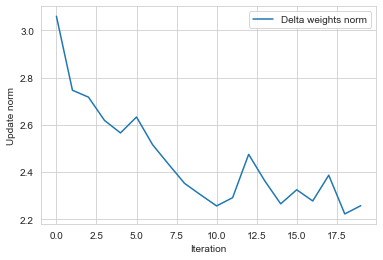

In [4]:
plt.plot(rbm.delta_weight_vh_norm, label="Delta weights norm")

plt.xlabel('Iteration')
plt.ylabel('Update norm')
plt.legend()
plt.show()

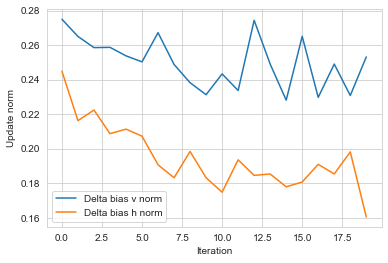

In [5]:
plt.plot(rbm.delta_bias_v_norm, label="Delta bias v norm")
plt.plot(rbm.delta_bias_h_norm, label="Delta bias h norm")

plt.xlabel('Iteration')
plt.ylabel('Update norm')
plt.legend()
plt.show()

## Reconstruction loss - 500 to 200 units

In [6]:
n_units = np.arange(200, 501, 100)
reconstruction_losses = []
for n_units_ in n_units:
  rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=n_units_,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

  rbm.cd1(visible_trainset=train_imgs, iterations_number=20)
  
  reconstruction_losses.append(rbm.losses)

learning CD1
iteration=      0 recon_loss=0.0457
iteration=      2 recon_loss=0.0408
iteration=      4 recon_loss=0.0395
iteration=      6 recon_loss=0.0386
iteration=      8 recon_loss=0.0382
iteration=     10 recon_loss=0.0375
iteration=     12 recon_loss=0.0381
iteration=     14 recon_loss=0.0375
iteration=     16 recon_loss=0.0373
iteration=     18 recon_loss=0.0373
learning CD1
iteration=      0 recon_loss=0.0430
iteration=      2 recon_loss=0.0385
iteration=      4 recon_loss=0.0382
iteration=      6 recon_loss=0.0373
iteration=      8 recon_loss=0.0368
iteration=     10 recon_loss=0.0367
iteration=     12 recon_loss=0.0363
iteration=     14 recon_loss=0.0365
iteration=     16 recon_loss=0.0358
iteration=     18 recon_loss=0.0356
learning CD1
iteration=      0 recon_loss=0.0415
iteration=      2 recon_loss=0.0382
iteration=      4 recon_loss=0.0373
iteration=      6 recon_loss=0.0372
iteration=      8 recon_loss=0.0366
iteration=     10 recon_loss=0.0359
iteration=     12 recon_l

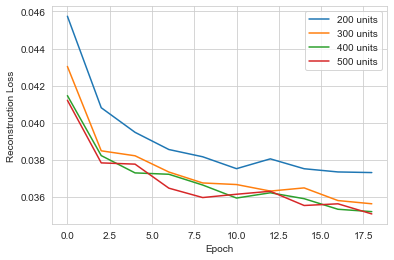

In [10]:
iterations = np.arange(0, 20, 2)
plt.plot(iterations, reconstruction_losses[0], label="200 units")
plt.plot(iterations, reconstruction_losses[1], label="300 units")
plt.plot(iterations, reconstruction_losses[2], label="400 units")
plt.plot(iterations, reconstruction_losses[3], label="500 units")

plt.xlabel('Epoch')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
losses = []
for img in test_imgs:
  _, h = rbm.get_h_given_v(img)
  _, reconstruction = rbm.get_v_given_h(h)
  loss = mean_squared_error(img, reconstruction)
  losses.append(loss)

In [15]:
np.mean(losses)

0.0351518130997497

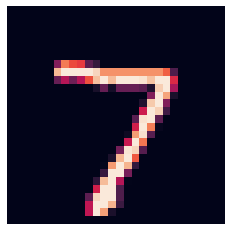

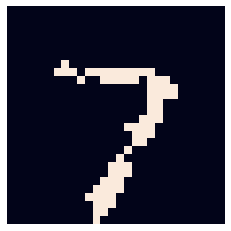

In [33]:
_, h = rbm.get_h_given_v(test_imgs[0])
_, reconstruction = rbm.get_v_given_h(h)

plt.imshow(test_imgs[0].reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

plt.imshow(reconstruction.reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

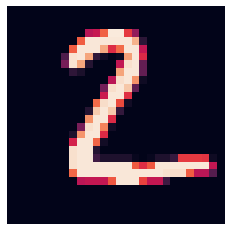

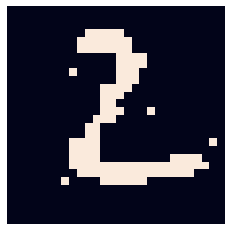

In [34]:
_, h = rbm.get_h_given_v(test_imgs[1])
_, reconstruction = rbm.get_v_given_h(h)

plt.imshow(test_imgs[1].reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()

plt.imshow(reconstruction.reshape((image_size[0], image_size[1], -1)))
plt.grid(False)
plt.axis('off')
plt.show()